# Tesla dataset

> We'll be creating an LSTM model for Closing price prediction

-------------------------------------------------------------------------------------------------------------------------------
#### 1. Import libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import datetime
import mplfinance as mpf

-------------------------------------------------------------------------------------------------------------------------------
#### 2. Import Dataset

In [149]:
data = pd.read_csv('tesla_stock_sentiment_data.csv')
data_alt = pd.read_csv('tesla_stock_sentiment_data.csv')

In [150]:
data.head()

,Date,Sentiment,Open,High,Low,Close,Volume,RSI_14,SMA_20,EMA_20
0,2013-01-29,0.505748,2.540000,2.562667,2.475333,2.530000,21399000,73.639417,2.326000,2.326000
1,2013-01-30,0.505748,2.523333,2.533333,2.495333,2.501333,14521500,68.913398,2.338167,2.342698
2,2013-01-31,0.505748,2.524667,2.524667,2.462000,2.500667,13521000,68.802937,2.345333,2.357743
3,2013-02-01,0.505748,2.544667,2.566667,2.508000,2.553333,16509000,72.550435,2.357100,2.376371
4,2013-02-04,0.503098,2.560000,2.561333,2.506000,2.516000,16920000,66.456306,2.368233,2.389669


In [101]:
#data = data[(data["Date"]>='2013-01-29') & (data["Date"]<='2016-11-29')]

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2566 non-null   object 
 1   Sentiment  2566 non-null   float64
 2   Open       2566 non-null   float64
 3   High       2566 non-null   float64
 4   Low        2566 non-null   float64
 5   Close      2566 non-null   float64
 6   Volume     2566 non-null   int64  
 7   RSI_14     2566 non-null   float64
 8   SMA_20     2566 non-null   float64
 9   EMA_20     2566 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 200.6+ KB


In [152]:
'''
As we can see that the 'Date' column has the data type, Object. 
So let's change the datatype to Datetime.

'''

def datetime_change(s):
    split = s.split("-")
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)


In [153]:
# now lets apply it to each observation in our 'Date' column

data['Date'] = data['Date'].apply(datetime_change)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2566 non-null   datetime64[ns]
 1   Sentiment  2566 non-null   float64       
 2   Open       2566 non-null   float64       
 3   High       2566 non-null   float64       
 4   Low        2566 non-null   float64       
 5   Close      2566 non-null   float64       
 6   Volume     2566 non-null   int64         
 7   RSI_14     2566 non-null   float64       
 8   SMA_20     2566 non-null   float64       
 9   EMA_20     2566 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 200.6 KB


-------------------------------------------------------------------------------------------------------------------------------
#### 3. Check for missing values

In [154]:
missing_val = data.isna().sum()

if missing_val.sum()>0:
    print('There are missing values!')
    print('>> There are '+str(missing_val)+' missing values.')
else:
    print('There are no missing values!')

There are no missing values!


-------------------------------------------------------------------------------------------------------------------------------
#### 4. Encode Categorical data

##### >>There is no Categorical data

-------------------------------------------------------------------------------------------------------------------------------
#### 5. Feature selection

In [155]:
data = data.drop('RSI_14', axis = 1)
data = data.drop('SMA_20', axis = 1)
data = data.drop('EMA_20', axis = 1)

In [156]:
data.head()

,Date,Sentiment,Open,High,Low,Close,Volume
0,2013-01-29,0.505748,2.540000,2.562667,2.475333,2.530000,21399000
1,2013-01-30,0.505748,2.523333,2.533333,2.495333,2.501333,14521500
2,2013-01-31,0.505748,2.524667,2.524667,2.462000,2.500667,13521000
3,2013-02-01,0.505748,2.544667,2.566667,2.508000,2.553333,16509000
4,2013-02-04,0.503098,2.560000,2.561333,2.506000,2.516000,16920000


-------------------------------------------------------------------------------------------------------------------------------
#### 6. Visualizations

In [75]:
print(mpf.available_styles())

['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


In [157]:
data_alt.index = data_alt.pop('Date')
#data_alt = pd.DataFrame({'Close': data_alt['Close']})
data_alt.index = pd.to_datetime(data_alt.index)

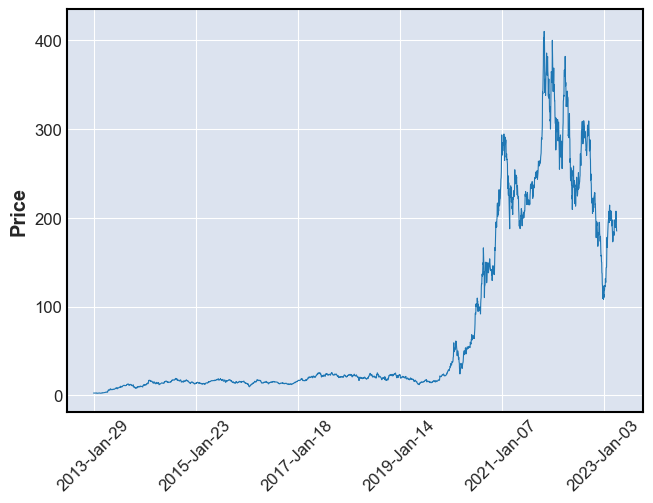

In [158]:
mpf.plot(data_alt, type='line', style='kenan')

In [159]:
# a) lets create a graph showing the Closing Price for the start of each day

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(data.Date), y=list(data.Close)))

# Set title
fig.update_layout(
    title_text="Closing Prices Each Day"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### Moving Average Plot

In [160]:
dates = data["Date"]

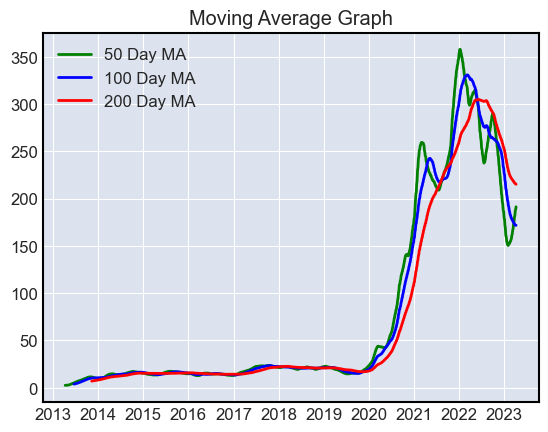

In [161]:
moving_av_50= data['Close'].rolling(50).mean()
moving_av_100= data['Close'].rolling(100).mean()
moving_av_200= data['Close'].rolling(200).mean()

plt.plot(dates, moving_av_50, color='g')
plt.plot(dates, moving_av_100, color='blue')
plt.plot(dates, moving_av_200, color='r')

plt.title("Moving Average Graph")
plt.legend(['50 Day MA', '100 Day MA', '200 Day MA'])

-------------------------------------------------------------------------------------------------------------------------------
#### 7.Arrange dataset

In [162]:
#data.index = data.pop('Date')
data.head()

,Date,Sentiment,Open,High,Low,Close,Volume
0,2013-01-29,0.505748,2.540000,2.562667,2.475333,2.530000,21399000
1,2013-01-30,0.505748,2.523333,2.533333,2.495333,2.501333,14521500
2,2013-01-31,0.505748,2.524667,2.524667,2.462000,2.500667,13521000
3,2013-02-01,0.505748,2.544667,2.566667,2.508000,2.553333,16509000
4,2013-02-04,0.503098,2.560000,2.561333,2.506000,2.516000,16920000


In [163]:
data = data[["Date", "Open", "High", "Low", "Volume", "Sentiment", "Close"]]
data.head()

,Date,Open,High,Low,Volume,Sentiment,Close
0,2013-01-29,2.540000,2.562667,2.475333,21399000,0.505748,2.530000
1,2013-01-30,2.523333,2.533333,2.495333,14521500,0.505748,2.501333
2,2013-01-31,2.524667,2.524667,2.462000,13521000,0.505748,2.500667
3,2013-02-01,2.544667,2.566667,2.508000,16509000,0.505748,2.553333
4,2013-02-04,2.560000,2.561333,2.506000,16920000,0.503098,2.516000


-------------------------------------------------------------------------------
#### Data Normalization

In [164]:
data_2 = data.drop('Date', axis=1)
data_2 = (data_2 - data_2.min())/(data_2.max() - data_2.min())
data = pd.concat((data_2, data['Date']), 1)

data = data.iloc[:, [6,0,1,2,3,4,5] ]
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7732\389629194.py:3: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,Date,Open,High,Low,Volume,Sentiment,Close
0,2013-01-29,0.000601,0.000563,0.000550,0.016305,0.505748,0.000584
1,2013-01-30,0.000560,0.000492,0.000600,0.008726,0.505748,0.000513
2,2013-01-31,0.000564,0.000471,0.000517,0.007623,0.505748,0.000512
3,2013-02-01,0.000613,0.000573,0.000631,0.010916,0.505748,0.000641
4,2013-02-04,0.000650,0.000560,0.000626,0.011369,0.503097,0.000549


======================================================================================================================

-------------------------------------------------------------------------------------------------------------------------------
#### 3. Data Splitting

In [92]:
#tesla_df = data

In [93]:
#%store tesla_df

Stored 'tesla_df' (DataFrame)


In [165]:
y = data.iloc[:, 6]
X = data.iloc[:, 0:6]
X.head()

,Date,Open,High,Low,Volume,Sentiment
0,2013-01-29,0.000601,0.000563,0.000550,0.016305,0.505748
1,2013-01-30,0.000560,0.000492,0.000600,0.008726,0.505748
2,2013-01-31,0.000564,0.000471,0.000517,0.007623,0.505748
3,2013-02-01,0.000613,0.000573,0.000631,0.010916,0.505748
4,2013-02-04,0.000650,0.000560,0.000626,0.011369,0.503097


In [166]:
y.head()

0    0.000584
1    0.000513
2    0.000512
3    0.000641
4    0.000549
Name: Close, dtype: float64

In [167]:
y = pd.DataFrame({'Date':X["Date"],'Close':y})

In [168]:
y.head()

,Date,Close
0,2013-01-29,0.000584
1,2013-01-30,0.000513
2,2013-01-31,0.000512
3,2013-02-01,0.000641
4,2013-02-04,0.000549


In [169]:
dates = X.iloc[:, 0]
len(dates)

2566

In [170]:
X.index = X.pop('Date')
X

,Open,High,Low,Volume,Sentiment
Date,,,,,
2013-01-29,0.000601,0.000563,0.000550,0.016305,0.505748
2013-01-30,0.000560,0.000492,0.000600,0.008726,0.505748
2013-01-31,0.000564,0.000471,0.000517,0.007623,0.505748
2013-02-01,0.000613,0.000573,0.000631,0.010916,0.505748
2013-02-04,0.000650,0.000560,0.000626,0.011369,0.503097
...,...,...,...,...,...
2023-03-31,0.477144,0.498487,0.483243,0.179658,0.626729
2023-04-03,0.482961,0.486113,0.470849,0.179556,0.355558
2023-04-04,0.476631,0.476530,0.466189,0.132081,0.372693


In [171]:
y.index = y.pop('Date')
y

,Close
Date,
2013-01-29,0.000584
2013-01-30,0.000513
2013-01-31,0.000512
2013-02-01,0.000641
2013-02-04,0.000549
...,...
2023-03-31,0.503260
2023-04-03,0.472132
2023-04-04,0.466761


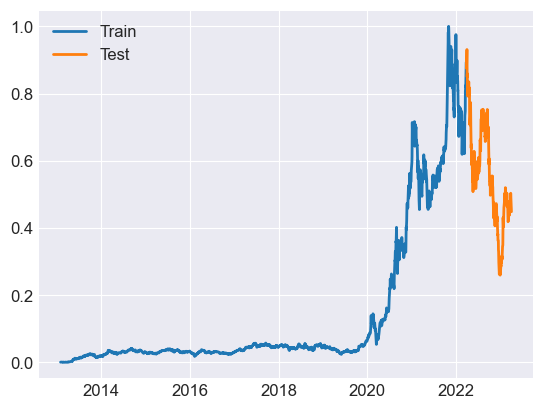

In [177]:
sns.set_style('darkgrid')
q_90 = int(len(dates) * 0.90)
q_95 = int(len(dates) * 0.95)

dates_train, X_train, y_train = dates[:q_90], X[:q_90], y[:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Test'])

========================================================================================================================

# Model creation

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.model_selection import TimeSeriesSplit

model = Sequential([layers.Input((5, 1)),
                    layers.LSTM(64),# the number determines how complex your model
                    layers.Dense(32, activation='relu'),
                    layers.Dense(16, activation='relu'),
                    layers.Dense(8, activation='relu'),
                    layers.Dense(1)]) # only one value to be predicted

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
73/73 [==============================] - 5s 7ms/step - loss: 0.0466 - mean_absolute_error: 0.1148
Epoch 2/30
73/73 [==============================] - 1s 7ms/step - loss: 0.0302 - mean_absolute_error: 0.1290
Epoch 3/30
73/73 [==============================] - 1s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0965
Epoch 4/30
73/73 [==============================] - 1s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0395
Epoch 5/30
73/73 [==============================] - 0s 7ms/step - loss: 5.8985e-04 - mean_absolute_error: 0.0164
Epoch 6/30
73/73 [==============================] - 0s 6ms/step - loss: 4.4687e-04 - mean_absolute_error: 0.0143
Epoch 7/30
73/73 [==============================] - 0s 7ms/step - loss: 3.9848e-04 - mean_absolute_error: 0.0135
Epoch 8/30
73/73 [==============================] - 0s 7ms/step - loss: 3.6686e-04 - mean_absolute_error: 0.0130
Epoch 9/30
73/73 [==============================] - 0s 6ms/step - loss: 3.4446e-04 - mean_absolute_error: 0.0125

-------------------------------------------------------------------------------------------------------------------------------

#### 5. Predictions

##### Training Predictions

73/73 [==============================] - 0s 5ms/step


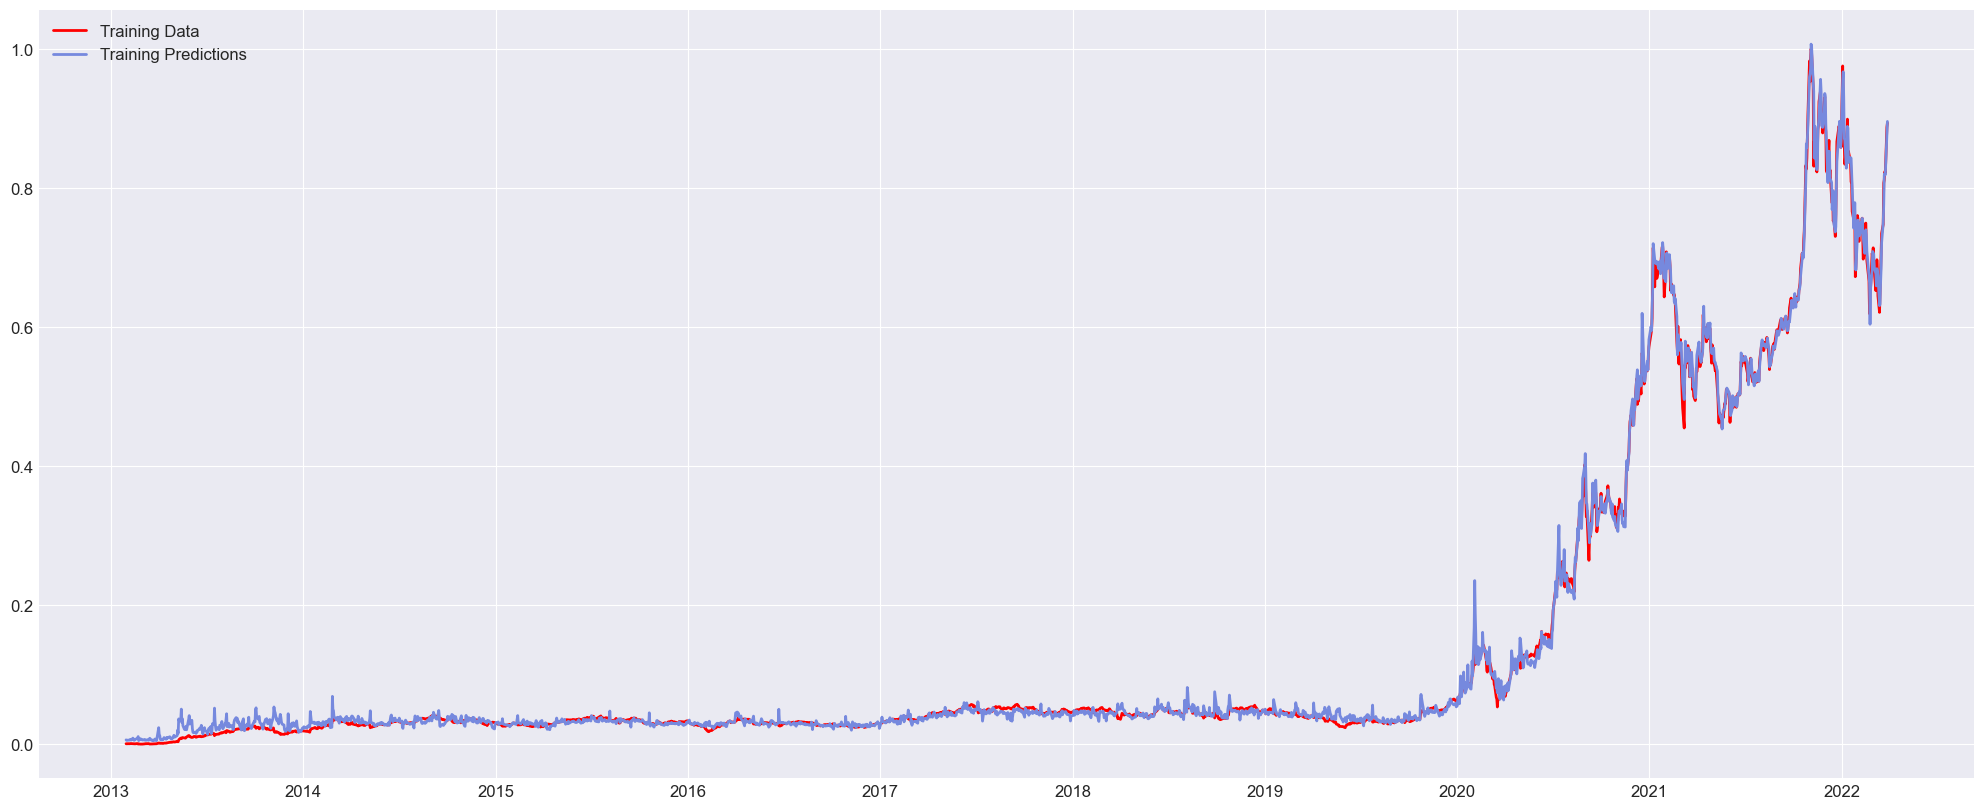

In [204]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(25, 10))
plt.plot(dates_train, y_train, color="#FF0000")
plt.plot(dates_train, train_predictions, color="#7689de")
plt.legend(['Training Data', 'Training Predictions'])

In [180]:
#y_train_df=pd.DataFrame({'Data':y_train})
train_predictions_df=pd.DataFrame({'Date':y_train.index,'Data':train_predictions})

In [181]:
train_predictions_df.index = train_predictions_df.pop("Date")
train_predictions_df.head()

,Data
Date,
2013-01-29,0.005711
2013-01-30,0.005191
2013-01-31,0.005104
2013-02-01,0.005372
2013-02-04,0.005424


In [191]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_train, train_predictions_df)
mse = mean_squared_error(y_train, train_predictions_df)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Absolute Error:', rmse)

Mean Absolute Error: 0.00686843968485947
Mean Squared Error: 0.0001068455080925957
Root Mean Absolute Error: 0.010336610087093143


--------------------------------------------------------------------------------------------------------------------------------

##### Test Predictions

9/9 [==============================] - 0s 7ms/step


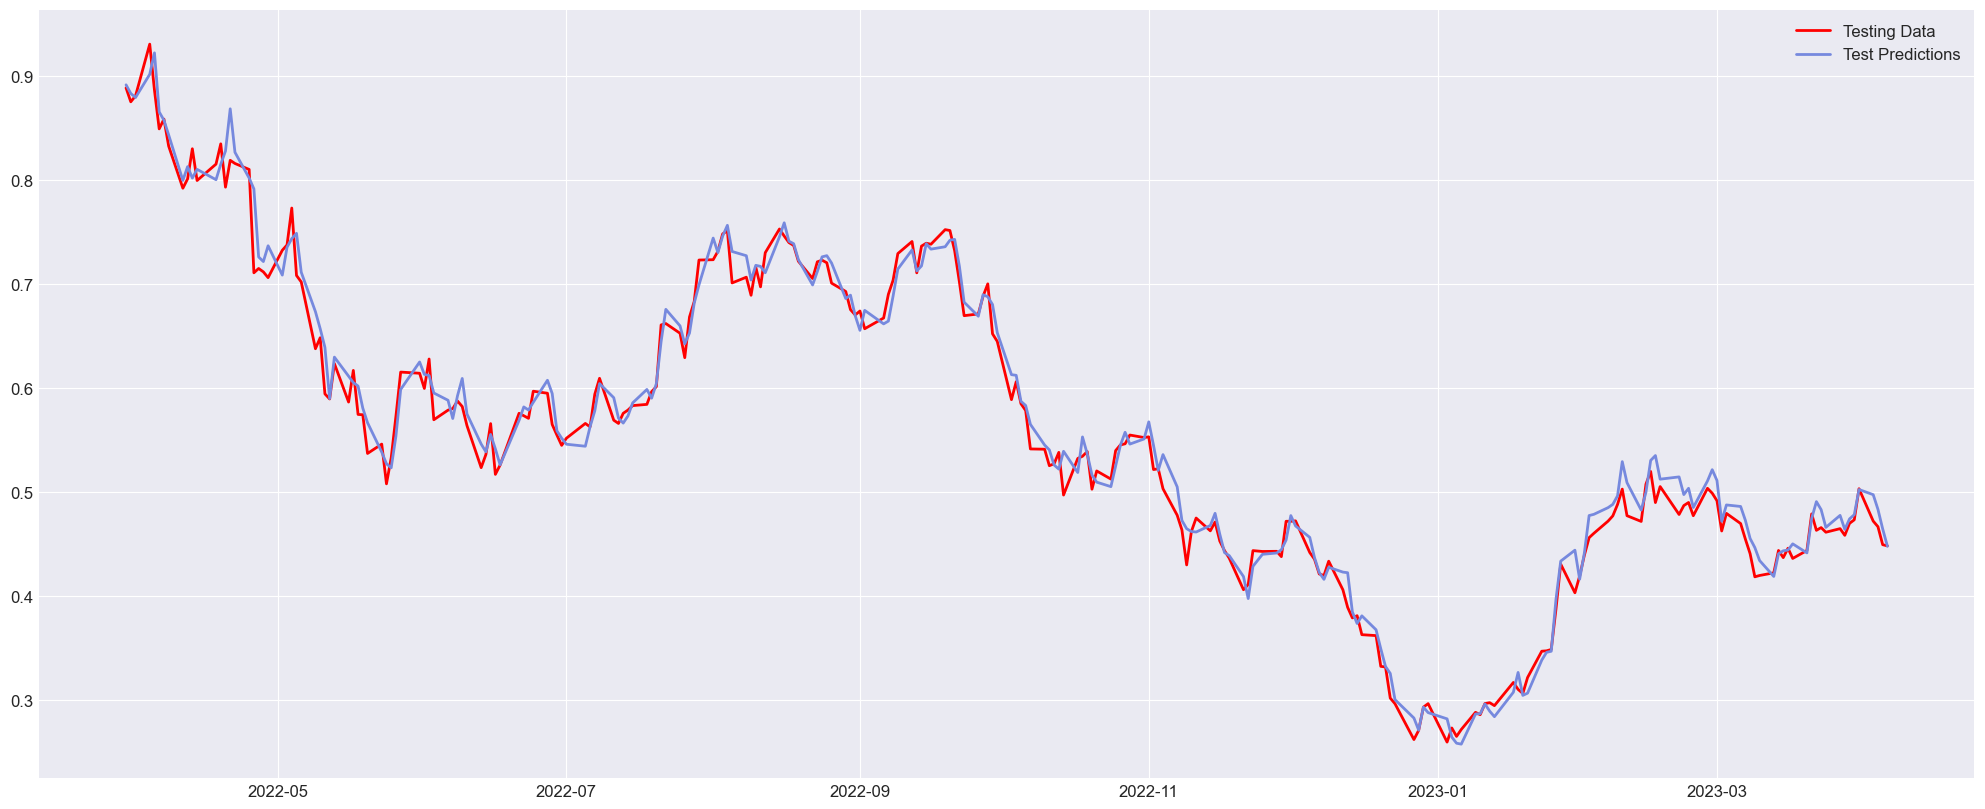

In [203]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(25, 10))
plt.plot(dates_test, y_test, color="#FF0000")
plt.plot(dates_test, test_predictions, color="#7689de")
plt.legend(['Testing Data', 'Test Predictions'])

------------------------------------------------------------------------------------------------------------------------------
#### 6. Error evaluation

In [195]:
test_predictions_df=pd.DataFrame({'Date':y_test.index,'Data':test_predictions})
test_predictions_df.index = test_predictions_df.pop("Date")
test_predictions_df.head()

,Data
Date,
2022-03-30,0.891819
2022-03-31,0.883490
2022-04-01,0.879571
2022-04-04,0.901904
2022-04-05,0.922561


In [196]:
mae = mean_absolute_error(y_test, test_predictions_df)
mse = mean_squared_error(y_test, test_predictions_df)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Absolute Error:', rmse)

Mean Absolute Error: 0.012673449398492496
Mean Squared Error: 0.00027834388441930777
Root Mean Absolute Error: 0.01668364122184686


========================================================================================================================

In [105]:
#test_predictions_df.to_csv('LSTM_Test_Predictions.csv', sep='\t', encoding='utf-8')

In [205]:
d = pd.read_csv("AppleFinalUnscaled.csv")
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Compound,Neg,Neu,Pos
0,2006-12-01,3.278571,3.297500,3.217857,3.261429,2.768290,7.950796e+08,0.7707,0.032,0.905,0.063
1,2006-12-04,3.281429,3.287500,3.232143,3.254286,2.762227,7.095368e+08,0.8720,0.011,0.904,0.085
2,2006-12-05,3.273214,3.297500,3.245357,3.259643,2.766773,6.628384e+08,0.0000,0.000,0.000,0.000
3,2006-12-06,3.237143,3.263929,3.202500,3.208214,2.723121,6.381844e+08,0.6858,0.029,0.878,0.093
4,2006-12-07,3.215357,3.232143,3.103571,3.108571,2.638544,1.004828e+09,-0.6712,0.091,0.869,0.040


# References

1. https://www.youtube.com/@GregHogg
2. https://stackoverflow.com/questions/33157528/correlation-between-two-dataframes
3. https://plotly.com/python/range-slider/